[Saved] Figure saved to /home/ms6730/SBI_calibration/sensitivity_hydraulic_conductvity_gage_1/hydrograph_plots_senstivity_k/streamflow_increased_K.png


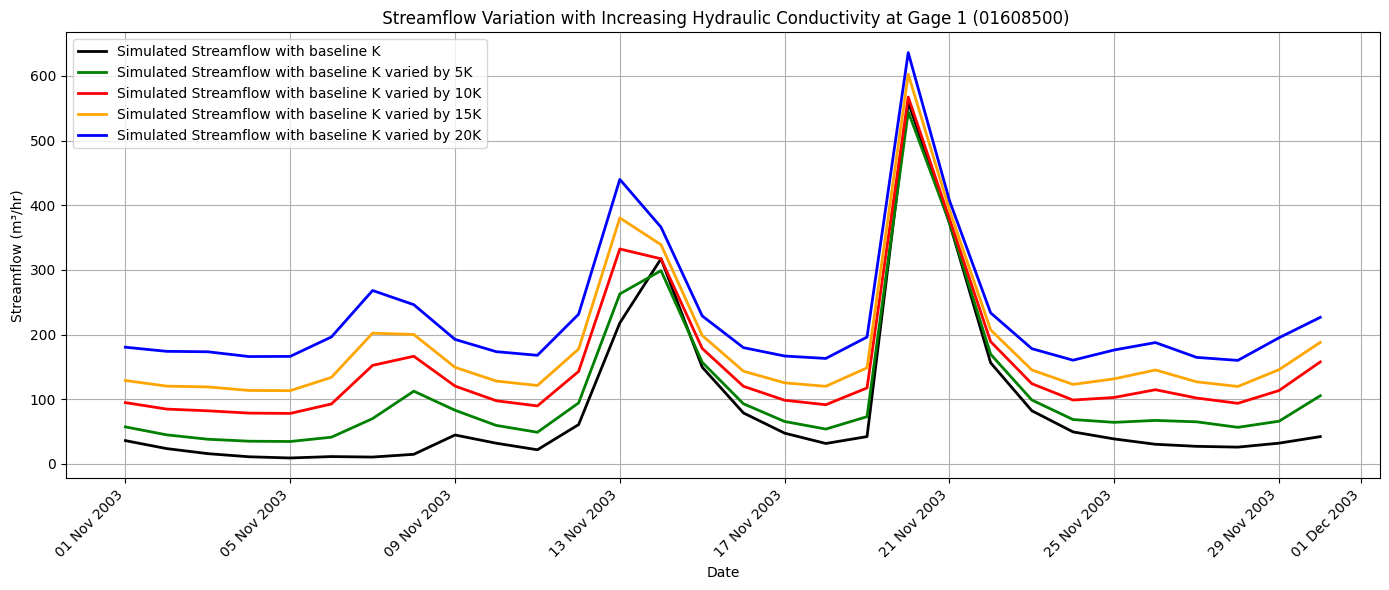

In [10]:
#### Range of Prior between 0.009 and 0.01 for Manning's distribution #####

# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Station ID
# ----------------------------------------------------
station_id = '01608500'

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_5_k_baseline = pd.read_csv("/home/ms6730/SBI_calibration/sensitivity_hydraulic_conductvity_gage_1/streamflow_k_variation_excels/streamflow_sim_5_k_baseline.csv")
df_base = pd.read_csv("/home/ms6730/testing_prior_range_excel/streamflow_daily_20_0.009_0.3_M_ens_4.csv")
df_10_k_baseline = pd.read_csv("/home/ms6730/sensitivity_K_excel/streamflow_sim_10_k_baseline.csv")
df_15_k_baseline = pd.read_csv("/home/ms6730/sensitivity_K_excel/streamflow_sim_15_k_baseline.csv")
df_20_k_baseline = pd.read_csv("/home/ms6730/sensitivity_K_excel/streamflow_sim_20_k_baseline.csv")

# ----------------------------------------------------
# Process each DataFrame: convert 'date' to datetime and set as index
# ----------------------------------------------------

def process_df(df):
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    return df

df_5_k_baseline = process_df(df_5_k_baseline)
df_10_k_baseline = process_df(df_10_k_baseline)
df_15_k_baseline = process_df(df_15_k_baseline)
df_20_k_baseline = process_df(df_20_k_baseline)

# ----------------------------------------------------
# Drop First 5 Days from base
# ----------------------------------------------------
dates_base = pd.to_datetime(df_base["date"])[5:]
df_base = df_base.iloc[5:].reset_index(drop=True)

# ----------------------------------------------------
# Plot All Data
# ----------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot simulated streamflow with the baseline K
plt.plot(
    dates_base,
    df_base[station_id],
    color='black', linewidth=2,
    label='Simulated Streamflow with baseline K',
    zorder=10
)

# Plot simulated streamflow with 5K baseline
plt.plot(
    df_5_k_baseline.iloc[5:].index,
    df_5_k_baseline.iloc[5:][station_id],
    color='green', linewidth=2,
    label='Simulated Streamflow with baseline K varied by 5K',
    zorder=10
)

# Plot simulated streamflow with 10K baseline
plt.plot(
    df_10_k_baseline.iloc[5:].index,
    df_10_k_baseline.iloc[5:][station_id],
    color='red', linewidth=2,
    label='Simulated Streamflow with baseline K varied by 10K',
    zorder=10
)

# Plot simulated streamflow with 15K baseline
plt.plot(
    df_15_k_baseline.iloc[5:].index,
    df_15_k_baseline.iloc[5:][station_id],
    color='orange', linewidth=2,
    label='Simulated Streamflow with baseline K varied by 15K',
    zorder=10
)

# Plot simulated streamflow with 20K baseline
plt.plot(
    df_20_k_baseline.iloc[5:].index,
    df_20_k_baseline.iloc[5:][station_id],
    color='blue', linewidth=2,
    label='Simulated Streamflow with baseline K varied by 20K',
    zorder=10
)

# Titles and labels
plt.title(f" Streamflow Variation with Increasing Hydraulic Conductivity at Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_dir = "/home/ms6730/SBI_calibration/sensitivity_hydraulic_conductvity_gage_1/hydrograph_plots_senstivity_k/"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "streamflow_increased_K.png")

plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"[Saved] Figure saved to {output_path}")


# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()
